<a href="https://colab.research.google.com/github/chingyunghuang/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C%EF%BC%8301_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
# preprocessing data

# one hot encoding for Pclass and Sex 
train_data1 = pd.concat([train_data, pd.get_dummies(train_data["Pclass"],prefix='Class')], axis=1)
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Sex"])], axis=1)

# fill na
train_data1[["Embarked"]] = train_data1[["Embarked"]].fillna('S')
train_data1[["Age"]] = train_data1[["Age"]].fillna(train_data1[["Age"]].mean())

# one hot encoding for Embarked
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Embarked"],prefix='Embarked')], axis=1)

train_data1.head()
train_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Class_1      891 non-null    uint8  
 13  Class_2      891 non-null    uint8  
 14  Class_3      891 non-null    uint8  
 15  female       891 non-null    uint8  
 16  male         891 non-null    uint8  
 17  Embarked_C   891 non-null    uint8  
 18  Embarked_Q   891 non-null    uint8  
 19  Embarked

['Age', 'Embarked_C', 'Class_2', 'male', 'Survived', 'Fare', 'Class_1', 'Class_3', 'Embarked_S', 'Parch', 'SibSp', 'Embarked_Q', 'female']


Age          -0.069809
Embarked_C    0.168240
Class_2       0.093349
male         -0.543351
Survived      1.000000
Fare          0.257307
Class_1       0.285904
Class_3      -0.322308
Embarked_S   -0.149683
Parch         0.081629
SibSp        -0.035322
Embarked_Q    0.003650
female        0.543351
Name: Survived, dtype: float64

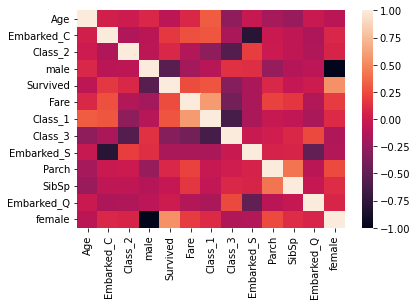

In [15]:
columns_X = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})

# plot the heatmap
corr=train_data1[columns_X].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。
train_data1[columns_X].corr()['Survived']
